In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
dataset = pd.read_csv('USDT_1M_graph_coinmarketcap.csv',sep=';')
# df = dataset.drop(columns=['name'])

In [3]:
df = dataset.drop(columns=['name'])

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

In [6]:
# df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [7]:
df.head(5)

,open,high,low,close,volume,marketCap,timestamp
0,1.000650,1.001302,1.000000,1.000429,4.562597e+10,1.097595e+11,2024-04-20 00:00:00+00:00
1,1.000411,1.001323,0.999651,1.000213,4.091427e+10,1.098576e+11,2024-04-21 00:00:00+00:00
2,1.000275,1.001463,0.999790,1.000336,5.274103e+10,1.098768e+11,2024-04-22 00:00:00+00:00
3,1.000333,1.001357,0.999911,1.000093,4.938957e+10,1.104144e+11,2024-04-23 00:00:00+00:00
4,1.000098,1.001097,0.998888,0.999802,6.099845e+10,1.104194e+11,2024-04-24 00:00:00+00:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   open       30 non-null     float64            
 1   high       30 non-null     float64            
 2   low        30 non-null     float64            
 3   close      30 non-null     float64            
 4   volume     30 non-null     float64            
 5   marketCap  30 non-null     float64            
 6   timestamp  30 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 1.8 KB


In [9]:
df.shape

(30, 7)

In [10]:
df.describe()

,open,high,low,close,volume,marketCap
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,0.999932,1.001405,0.999342,0.999922,4.802108e+10,1.069766e+11
std,0.000450,0.000347,0.000507,0.000427,1.454094e+10,2.020825e+10
min,0.998584,1.000723,0.998072,0.998557,0.000000e+00,0.000000e+00
25%,0.999649,1.001149,0.999108,0.999717,4.068589e+10,1.104384e+11
50%,0.999942,1.001439,0.999329,0.999934,4.956136e+10,1.107262e+11
75%,1.000253,1.001609,0.999776,1.000211,5.580505e+10,1.109117e+11
max,1.000650,1.002432,1.000000,1.000547,7.685953e+10,1.113555e+11


In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['hour'] = df['hour'].astype('float64')

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.day
df['day'] = df['day'].astype('float64')
df.head(5)

,open,high,low,close,volume,marketCap,timestamp,hour,day
0,1.000650,1.001302,1.000000,1.000429,4.562597e+10,1.097595e+11,2024-04-20 00:00:00+00:00,0.0,20.0
1,1.000411,1.001323,0.999651,1.000213,4.091427e+10,1.098576e+11,2024-04-21 00:00:00+00:00,0.0,21.0
2,1.000275,1.001463,0.999790,1.000336,5.274103e+10,1.098768e+11,2024-04-22 00:00:00+00:00,0.0,22.0
3,1.000333,1.001357,0.999911,1.000093,4.938957e+10,1.104144e+11,2024-04-23 00:00:00+00:00,0.0,23.0
4,1.000098,1.001097,0.998888,0.999802,6.099845e+10,1.104194e+11,2024-04-24 00:00:00+00:00,0.0,24.0


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
X = df[['open', 'high', 'low','volume', 'marketCap','day']].values
y = df['close'].values

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled.size

180

In [17]:
look_back = 1

In [18]:
from sklearn.model_selection import train_test_split
# Adjust train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=max(0.2, look_back/len(X_scaled)), random_state=42)


In [19]:
look_back = 1 # Number of previous time steps to use as input
X_train_reshaped = []
y_train_reshaped = []
for i in range(look_back, len(X_train)):
    X_train_reshaped.append(X_train[i-look_back:i, :])
    y_train_reshaped.append(y_train[i])
X_train_reshaped, y_train_reshaped = np.array(X_train_reshaped), np.array(y_train_reshaped)
X_train_reshaped = np.reshape(X_train_reshaped, (X_train_reshaped.shape[0], X_train_reshaped.shape[1], X_train_reshaped.shape[2]))


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics='accuracy')

In [22]:
model.fit(X_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.0292 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0107 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9925 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9747 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9572 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9400 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.9228 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9057 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8886 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8713 - accuracy

In [23]:
X_test_reshaped = []
y_test_reshaped = []
for i in range(look_back, len(X_test)):
    X_test_reshaped.append(X_test[i-look_back:i, :])
    y_test_reshaped.append(y_test[i])
X_test_reshaped, y_test_reshaped = np.array(X_test_reshaped), np.array(y_test_reshaped)
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1], X_test_reshaped.shape[2]))

# Make predictions
predictions = model.predict(X_test_reshaped)
predictions = predictions.flatten()

# Evaluate the model
mse = mean_squared_error(y_test_reshaped, predictions)
mae = mean_absolute_error(y_test_reshaped, predictions)
r2 = r2_score(y_test_reshaped, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

1/1 [==============================] - 1s 763ms/step
Mean Squared Error: 0.005310912796961218
Mean Absolute Error: 0.06073900170173585
R-squared: -132666.67711732732


# Conv1D

In [24]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

model.add(MaxPooling1D(pool_size=1))

model.add(Flatten())

model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
1/1 [==============================] - 1s 568ms/step - loss: 1.0421 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9542 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8708 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7914 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7165 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6456 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4567 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy

In [25]:
# Reshape the test set for CNN
X_test_reshaped = []
for i in range(look_back, len(X_test)):
    X_test_reshaped.append(X_test[i-look_back:i, :])
X_test_reshaped = np.array(X_test_reshaped)
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1], X_test_reshaped.shape[2]))

y_test_adjusted = y_test[look_back:]

loss, accuracy = model.evaluate(X_test_reshaped, y_test_adjusted, verbose=0)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


Test loss: 0.0021600660402327776
Test accuracy: 0.0


In [26]:
# Make predictions
predictions = model.predict(X_test_reshaped)

# Flatten the predictions
predictions = predictions.flatten()

# Calculate MAE, MSE, and R2 score
mae = mean_absolute_error(y_test_adjusted, predictions)
mse = mean_squared_error(y_test_adjusted, predictions)
r2 = r2_score(y_test_adjusted, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')


1/1 [==============================] - 0s 81ms/step
Mean Absolute Error (MAE): 0.04360578705035645
Mean Squared Error (MSE): 0.0021600629653130464
R2 Score: -53957.81028195698


# RNN

In [27]:
from keras.layers import SimpleRNN
model = Sequential()

# Add a SimpleRNN layer
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add another SimpleRNN layer
model.add(SimpleRNN(units=50))

# Add a Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.5221 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 3.0203 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 2.5590 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 2.1387 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.7597 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 1.4220 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.1249 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8676 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4668 - accuracy: 0

In [28]:
# Reshape the test set for RNN
X_test_reshaped = []
for i in range(look_back, len(X_test)):
    X_test_reshaped.append(X_test[i-look_back:i, :])
X_test_reshaped = np.array(X_test_reshaped)
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1], X_test_reshaped.shape[2]))

# Adjust y_test to match X_test_reshaped
y_test_adjusted = y_test[look_back:]


In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_adjusted, verbose=0)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


Test loss: 0.0016438292805105448
Test accuracy: 0.0


In [30]:
# Make predictions
predictions = model.predict(X_test_reshaped)

# Flatten the predictions
predictions = predictions.flatten()

# Calculate MAE, MSE, and R2 score
mae = mean_absolute_error(y_test_adjusted, predictions)
mse = mean_squared_error(y_test_adjusted, predictions)
r2 = r2_score(y_test_adjusted, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')


1/1 [==============================] - 0s 224ms/step
Mean Absolute Error (MAE): 0.030255886982344982
Mean Squared Error (MSE): 0.0016438286439929527
R2 Score: -41062.172398961826


In [31]:
# import matplotlib.pyplot as plt
# plt.plot(model.history.history['loss'],'r',linewidth=2, label='Training loss')
# plt.plot(model.history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
# plt.title('RNN Neural Networks - ETH Model')

# new approach

# Libraries

In [32]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error


# Reading the data

In [33]:
dataset = pd.read_csv('USDT_1M_graph_coinmarketcap.csv',sep=';')

In [34]:
df = dataset.drop(columns=['name'])

In [35]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [36]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

In [37]:
df.head()

,open,high,low,close,volume,marketCap,timestamp
0,1.000650,1.001302,1.000000,1.000429,4.562597e+10,1.097595e+11,2024-04-20 00:00:00+00:00
1,1.000411,1.001323,0.999651,1.000213,4.091427e+10,1.098576e+11,2024-04-21 00:00:00+00:00
2,1.000275,1.001463,0.999790,1.000336,5.274103e+10,1.098768e+11,2024-04-22 00:00:00+00:00
3,1.000333,1.001357,0.999911,1.000093,4.938957e+10,1.104144e+11,2024-04-23 00:00:00+00:00
4,1.000098,1.001097,0.998888,0.999802,6.099845e+10,1.104194e+11,2024-04-24 00:00:00+00:00


# Data Preprocessing

In [38]:
df = df.drop(columns=['marketCap'])

In [39]:
df['date'] = df['timestamp'].dt.date

In [40]:
df = df.drop(columns=['timestamp'])

In [41]:
df.head()

,open,high,low,close,volume,date
0,1.000650,1.001302,1.000000,1.000429,4.562597e+10,2024-04-20
1,1.000411,1.001323,0.999651,1.000213,4.091427e+10,2024-04-21
2,1.000275,1.001463,0.999790,1.000336,5.274103e+10,2024-04-22
3,1.000333,1.001357,0.999911,1.000093,4.938957e+10,2024-04-23
4,1.000098,1.001097,0.998888,0.999802,6.099845e+10,2024-04-24


In [42]:
df = df.set_index('date')

In [43]:
df.index = pd.to_datetime(df.index,unit='ns')
df.index

DatetimeIndex(['2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29', '2024-04-30', '2024-05-01',
               '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05',
               '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09',
               '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13',
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19'],
              dtype='datetime64[ns]', name='date', freq=None)

# EDA

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2024-04-20 to 2024-05-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    30 non-null     float64
 1   high    30 non-null     float64
 2   low     30 non-null     float64
 3   close   30 non-null     float64
 4   volume  30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB


In [45]:
df.shape

(30, 5)

In [46]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [47]:
df.describe()

,open,high,low,close,volume
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,0.999932,1.001405,0.999342,0.999922,4.802108e+10
std,0.000450,0.000347,0.000507,0.000427,1.454094e+10
min,0.998584,1.000723,0.998072,0.998557,0.000000e+00
25%,0.999649,1.001149,0.999108,0.999717,4.068589e+10
50%,0.999942,1.001439,0.999329,0.999934,4.956136e+10
75%,1.000253,1.001609,0.999776,1.000211,5.580505e+10
max,1.000650,1.002432,1.000000,1.000547,7.685953e+10


In [48]:
X=df.drop(columns='close')
y=df['close']

In [49]:
X.head()

,open,high,low,volume
date,,,,
2024-04-20,1.000650,1.001302,1.000000,4.562597e+10
2024-04-21,1.000411,1.001323,0.999651,4.091427e+10
2024-04-22,1.000275,1.001463,0.999790,5.274103e+10
2024-04-23,1.000333,1.001357,0.999911,4.938957e+10
2024-04-24,1.000098,1.001097,0.998888,6.099845e+10


In [50]:
y.head()

date
2024-04-20    1.000429
2024-04-21    1.000213
2024-04-22    1.000336
2024-04-23    1.000093
2024-04-24    0.999802
Name: close, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
print(X_test.shape)

(6, 4)


In [53]:
print(y_test.shape)

(6,)


In [54]:
print(X_train.shape)

(24, 4)


In [55]:
print(y_train.shape)

(24,)


In [56]:
aim = ['Close']

In [57]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETH/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [58]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] + 2


In [59]:
X_train.head()

,open,high,low,volume
date,,,,
2024-05-18,1.000485,1.001463,0.999839,3.909187e+10
2024-05-14,0.999840,1.001147,0.999062,5.738080e+10
2024-05-02,0.998584,1.001685,0.998408,5.476981e+10
2024-04-20,1.000650,1.001302,1.000000,4.562597e+10
2024-04-24,1.000098,1.001097,0.998888,6.099845e+10


In [60]:
X_train = normalise_zero_base(X_train)
X_test = normalise_zero_base(X_test)
y_train = normalise_zero_base(y_train)
y_test = normalise_zero_base(y_test)

In [61]:
X_train.head()

,open,high,low,volume
date,,,,
2024-05-18,3.000000,3.000000,3.000000,3.000000
2024-05-14,2.999355,2.999685,2.999223,3.467845
2024-05-02,2.998100,3.000222,2.998569,3.401054
2024-04-20,3.000165,2.999840,3.000161,3.167147
2024-04-24,2.999613,2.999635,2.999048,3.560387


In [62]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)

In [63]:
X_train.shape

(24, 1, 4)

In [64]:
X_test.shape

(6, 1, 4)

In [65]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETH/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

# Model

In [66]:
from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
def build_lstm_model(input_data, output_size, neurons, activ_func='tanh',
                     dropout=0.21, loss='mse', optimizer='adam'):
    model = Sequential()
    #model.add(LSTM(neurons,activation="tanh",return_sequences=True))
    model.add(RNN(cell=[SimpleRNNCell(128),
                                      SimpleRNNCell(256),
                                      SimpleRNNCell(128)]))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(64)
lstm_neurons = 256
epochs = 16
batch_size = 32
loss = 'mse'
dropout = 0.25
optimizer = 'adam'

In [67]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/16
1/1 [==============================] - 2s 2s/step - loss: 13.9866 - val_loss: 5.4687
Epoch 2/16
1/1 [==============================] - 0s 28ms/step - loss: 5.6357 - val_loss: 4.0492
Epoch 3/16
1/1 [==============================] - 0s 26ms/step - loss: 4.0596 - val_loss: 4.0022
Epoch 4/16
1/1 [==============================] - 0s 25ms/step - loss: 4.0040 - val_loss: 3.9989
Epoch 5/16
1/1 [==============================] - 0s 29ms/step - loss: 3.9999 - val_loss: 3.9985
Epoch 6/16
1/1 [==============================] - 0s 26ms/step - loss: 3.9989 - val_loss: 3.9984
Epoch 7/16
1/1 [==============================] - 0s 27ms/step - loss: 3.9988 - val_loss: 3.9984
Epoch 8/16
1/1 [==============================] - 0s 28ms/step - loss: 3.9988 - val_loss: 3.9984
Epoch 9/16
1/1 [==============================] - 0s 28ms/step - loss: 3.9988 - val_loss: 3.9984
Epoch 10/16
1/1 [==============================] - 0s 28ms/step - loss: 3.9988 - val_loss: 3.9984
Epoch 11/16
1/1 [=============

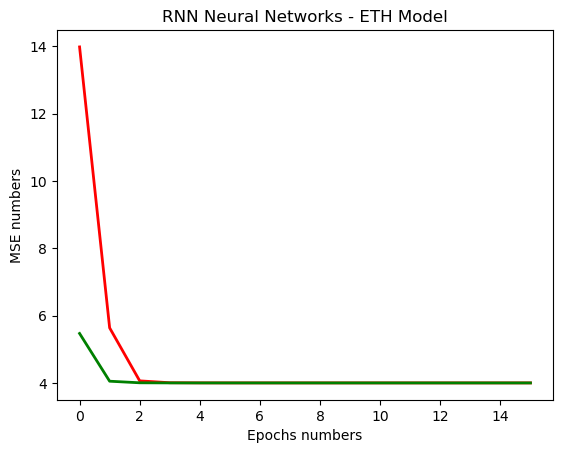

In [68]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks - ETH Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [69]:
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

1/1 [==============================] - 0s 172ms/step


1.999592213001036

In [70]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

3.9983690848854763

In [71]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

-6004359829.862222

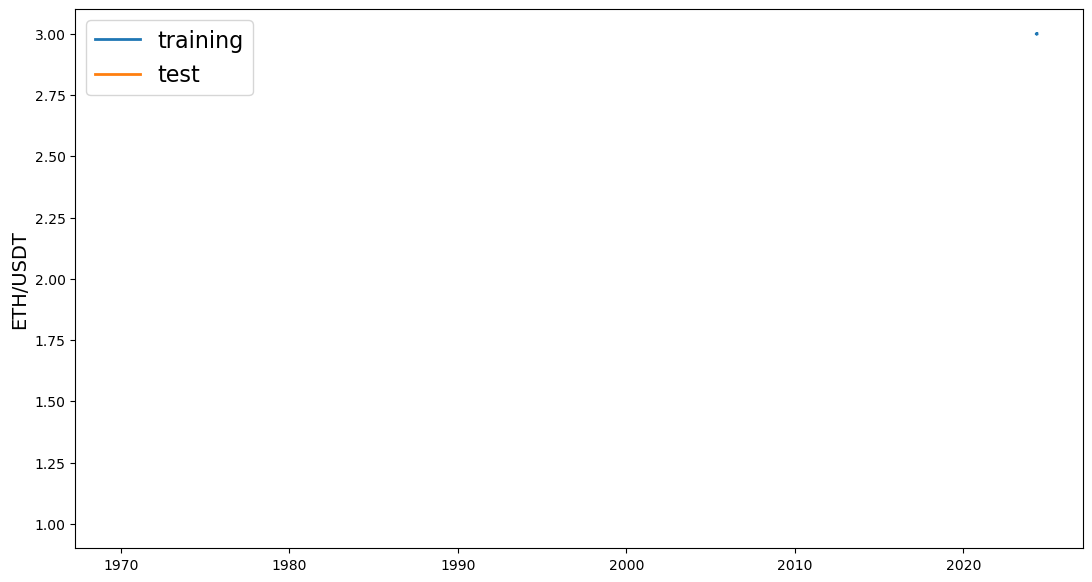

In [72]:
line_plot(y_test, preds, 'training', 'test', title='')